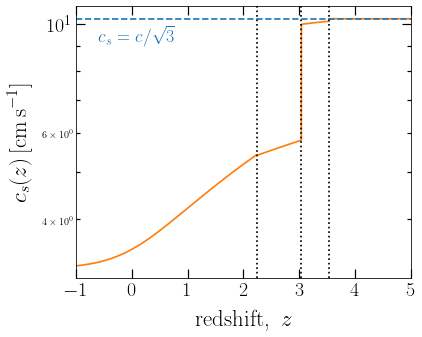

In [1]:
# Accretion of matter and radiation around the PBH from RD to MRE such that
# dm/dz = dm/dt . dt/dz with full dt/dz calculated from t_3 with
# t_3 = np.sqrt(3/(4 * np.pi * G * ρ_eq)) * ((2/3) * (s-2) * np.sqrt(s+1) + (4/3)).


from scipy.integrate import quad
import numpy as np
from scipy.integrate import odeint
from matplotlib import rcParams
import matplotlib.pyplot as plt
from matplotlib import rcParams
import scipy.integrate as spi
from scipy.integrate import solve_ivp
from scipy import integrate
from accretion import*
import math
plt.rcParams.update({
  "text.usetex": True,
  "font.family": "serif"
})

bin_centres = np.geomspace(1e5, 1e-5, 6)
bin_edges = np.sqrt(bin_centres[:-1]*bin_centres[1:])
ratio = bin_edges[1]/bin_edges[0] 
bin_edges = np.append(bin_edges[0]/ratio, bin_edges) 
bin_edges = np.append(bin_edges, bin_edges[-1]*ratio) 
deltas = np.diff(bin_edges)
Δ_1_list = deltas.tolist()
Δ_2_list = deltas.tolist()
m1_arr = np.geomspace(1e5, 1e-5, 6)
m2_arr = np.geomspace(1e5, 1e-5, 6)



# Accretion around the PBH from RD to MRE.
# Here, s = a/a_eq
# Here, v = c_s with c_s speed of sound in the surrounding medium.
# Here, γ is the ratio between the PBH mass and the horizon mass.



colors = ['C0', 'C1','C2','C3','C4', 'C5']
fig,ax = plt.subplots(1, figsize = (6, 5))
plt.rc('lines', linewidth = 1.7)
plt.rcParams['font.family'] = 'serif'
plt.tick_params(axis = 'both', right=True, top=True, which = 'minor', width= 1.2, length = 4, direction = 'in')
plt.tick_params(axis = 'both', right=True, top=True, which = 'major', width= 1.2, length = 9, direction = 'in')


z_arr = np.geomspace(0.1, 1e5, 100000)
c_s_arr = np.zeros(len(z_arr))
for i, z in enumerate(z_arr):
    c_s_arr[i] = c_s(z) * (pc/yr) * 100
    
ax.plot(np.log10(z_arr), np.log10(c_s_arr), 'C1')


plt.text(-0.6, 9.2, '$c_{s} = c/\sqrt{3}$', fontsize = 18, color = 'C0')
    

plt.axhline(y = np.log10(c/np.sqrt(3)* (pc/yr) * 100),  color = 'C0',  linestyle = '--')
plt.axvline(x = np.log10(z_th),  color = 'k',  linestyle = ':')
plt.axvline(x = np.log10(z_rec),  color = 'k',  linestyle = ':')
plt.axvline(x = np.log10(z_eq),  color = 'k',  linestyle = ':')


plt.xlim(-1, 5)
plt.yscale('log')
plt.xlabel('redshift, $\, z$',  fontsize = 23, labelpad = 10)
plt.ylabel(' $c_{s}(z)\, \mathrm{[cm \,s^{-1}}]$', fontsize = 23, labelpad = 10)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.savefig('c_s_z.pdf', bbox_inches = 'tight')
plt.show()

In [2]:
# Accretion of radiation as per ρ = ρ_r0 (1 + z)⁴ up to z_eq.
# Using dt/dz as per t_3 = np.sqrt(3/(4 * np.pi * G * ρ_eq)) * ((2/3) * (s-2) * np.sqrt(s+1) + (4/3)) 
def m_racc(z, m):
    t = z
    y = m
    β = ((4 * π * (G**2) * η_acc)) * np.sqrt(3/(8 * π * G * ρ_c0))
    dm = -β * (((m**2) * ρ_r0  * ((1 + z)**2))/ ((c_s(z)**3) * np.sqrt((Ω_r0 * ((1 + z)**2)) + (Ω_m0 * (1 + z)))))
    return  dm
    

### Accretion of baryons with ρ = ρ_b0 (1 + z)³ up to z_eq.
# Using dt/dz as per t_3 = np.sqrt(3/(4 * np.pi * G * ρ_eq)) * ((2/3) * (s-2) * np.sqrt(s+1) + (4/3)) 
def m_bacc(z, m):
    t = z
    y = m
    β = ((4 * π * (G**2) * η_acc)) * np.sqrt(3/(8 * π * G * ρ_c0))
    dm = -β * (((m**2) * ρ_b0  * (1 + z))/ ((c_s(z)**3) * np.sqrt((Ω_r0 * ((1 + z)**2)) + (Ω_m0 * (1 + z)))))
    return  dm

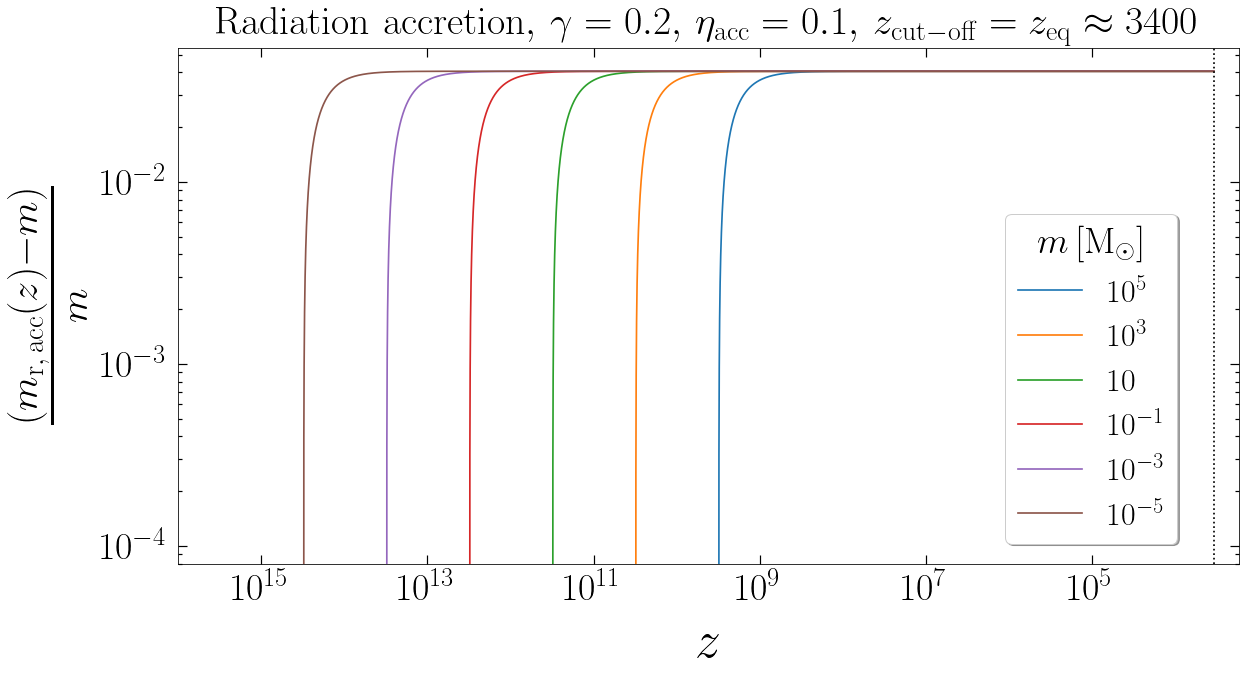

In [3]:
# Radiation accretion in radiation domination to upto z_eq.

colors = ['C0', 'C1','C2','C3','C4', 'C5']
fig,ax = plt.subplots(1, figsize = (19, 9.5))
plt.rc('lines', linewidth = 1.7)
plt.rcParams['font.family'] = 'serif'
plt.tick_params(axis = 'both', right=True, top=True, which = 'minor', width= 1.2, length = 4, direction = 'in')
plt.tick_params(axis = 'both', right=True, top=True, which = 'major', width= 1.2, length = 9, direction = 'in')



for i, (m1, color) in enumerate(zip(m1_arr, colors)):
    γ = 0.2
    z_i = z_pbh(m1,  γ)
    y = m1
    z_cut_off = z_eq
    t = np.geomspace(z_i, z_cut_off, 10000)
    sol = solve_ivp(m_racc, t_span = [t[0], t[-1]], y0 = [y],  t_eval = t)
    ax.loglog(sol.t, (sol.y[0] - y)/y)

    
    
    
    
    
plt.axvline(x = z_eq,  color = 'k',  linestyle = ':')
ax.tick_params(axis='x', pad = 9.9)
ax.tick_params(axis='y', pad = 9.9)


plt.xticks(fontsize = 38)
plt.yticks(fontsize = 38)
plt.xlabel('$z$',fontsize = 52, labelpad = 14)
plt.ylabel(r'$\frac{(m_\mathrm{r, \, acc}(z) - m)}{m} $',fontsize = 58, labelpad = 14)
plt.legend(['$10^{5}$', r'$10^{3}$', '$10$', 
            '$10^{-1}$', '$10^{-3}$', r'$10^{-5}$'], 
           prop = {'size':32}, loc = (0.78, 0.04), shadow = True, 
           title = '$m\, [\mathrm{M_{\odot}}]$' ,
           title_fontsize = 37, facecolor = 'white', fontsize = 65)
plt.xlim(1e16, 0.5*z_cut_off)
#plt.ylim(1e-5, 0.1)
plt.title(r'Radiation accretion$,\, \gamma = 0.2, \,\eta_\mathrm{acc} = 0.1,\, z_\mathrm{cut-off} = z_\mathrm{eq} \approx 3400$', fontsize = 40, pad = 13)
plt.savefig('racc_zeq.pdf', bbox_inches = 'tight')
plt.show()

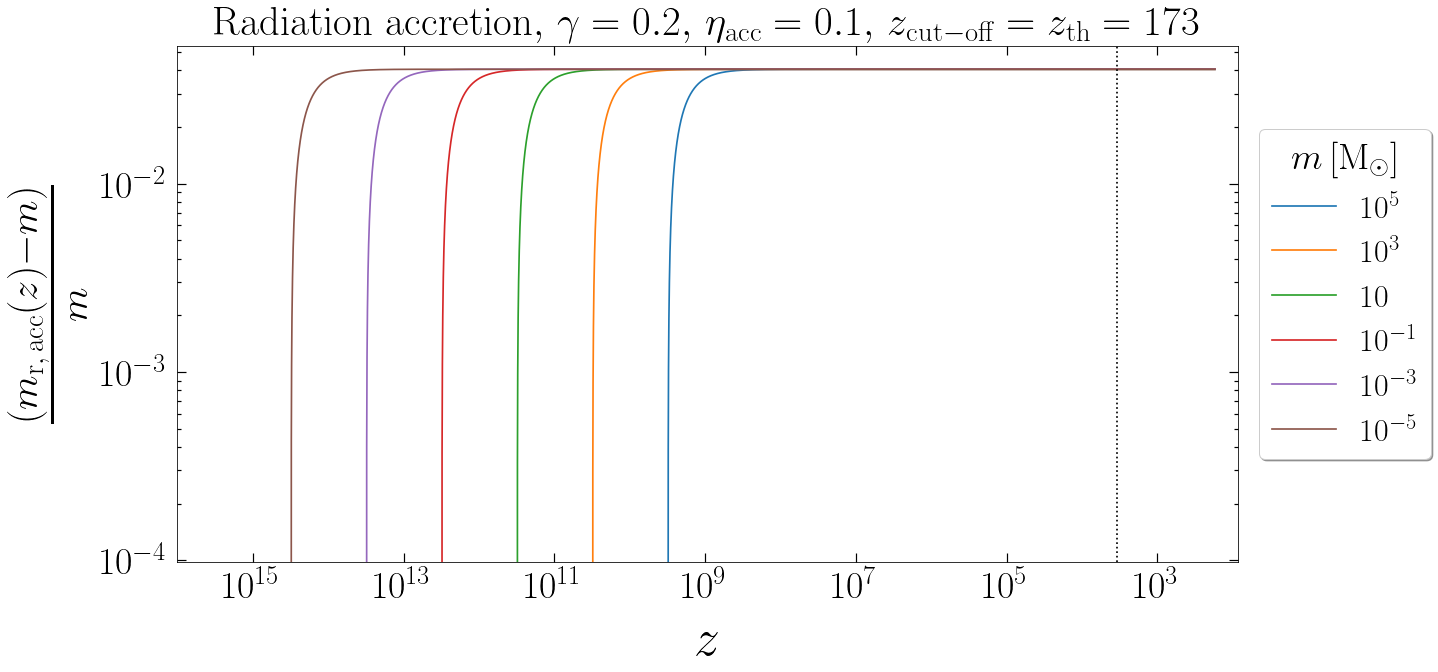

In [4]:
# Radiation accretion in radiation domination to redshift z = z_th = 173. 


colors = ['C0', 'C1','C2','C3','C4', 'C5']
fig,ax = plt.subplots(1, figsize = (19, 9.5))
plt.rc('lines', linewidth = 1.7)
plt.rcParams['font.family'] = 'serif'
plt.tick_params(axis = 'both', right=True, top=True, which = 'minor', width= 1.2, length = 4, direction = 'in')
plt.tick_params(axis = 'both', right=True, top=True, which = 'major', width= 1.2, length = 9, direction = 'in')



for i, (m1, color) in enumerate(zip(m1_arr, colors)):
    γ = 0.2
    z_i = z_pbh(m1,  γ)
    y = m1
    z_cut_off = z_th
    t = np.geomspace(z_i, z_cut_off, 10000)
    sol = solve_ivp(m_racc, t_span = [t[0], t[-1]], y0 = [y],  t_eval = t)
    ax.loglog(sol.t, (sol.y[0] - y)/y)

    
    
    
    
    
plt.axvline(x = z_eq,  color = 'k',  linestyle = ':')
ax.tick_params(axis='x', pad = 8.9)
ax.tick_params(axis='y', pad = 8.9)


plt.xticks(fontsize = 38)
plt.yticks(fontsize = 38)
plt.xlabel('$z$',fontsize = 52, labelpad = 14)
plt.ylabel(r'$\frac{(m_\mathrm{r, \, acc}(z) - m)}{m} $',fontsize = 58, labelpad = 14)

plt.legend(['$10^{5}$', r'$10^{3}$', '$10$', 
            '$10^{-1}$', '$10^{-3}$', r'$10^{-5}$'], 
           prop = {'size':32}, loc = (1.02, 0.2), shadow = True, 
           title = '$m\, [\mathrm{M_{\odot}}]$' ,
           title_fontsize = 37, facecolor = 'white', fontsize = 65)
plt.xlim(1e16, 0.5*z_cut_off)
#plt.ylim(1e-5, 0.1)
plt.title(r'Radiation accretion$,\, \gamma = 0.2, \,\eta_\mathrm{acc} = 0.1, \, z_\mathrm{cut-off} = z_\mathrm{th} = 173$', fontsize = 41, pad = 11)
plt.savefig('racc_z_th.pdf', bbox_inches = 'tight')
plt.show()

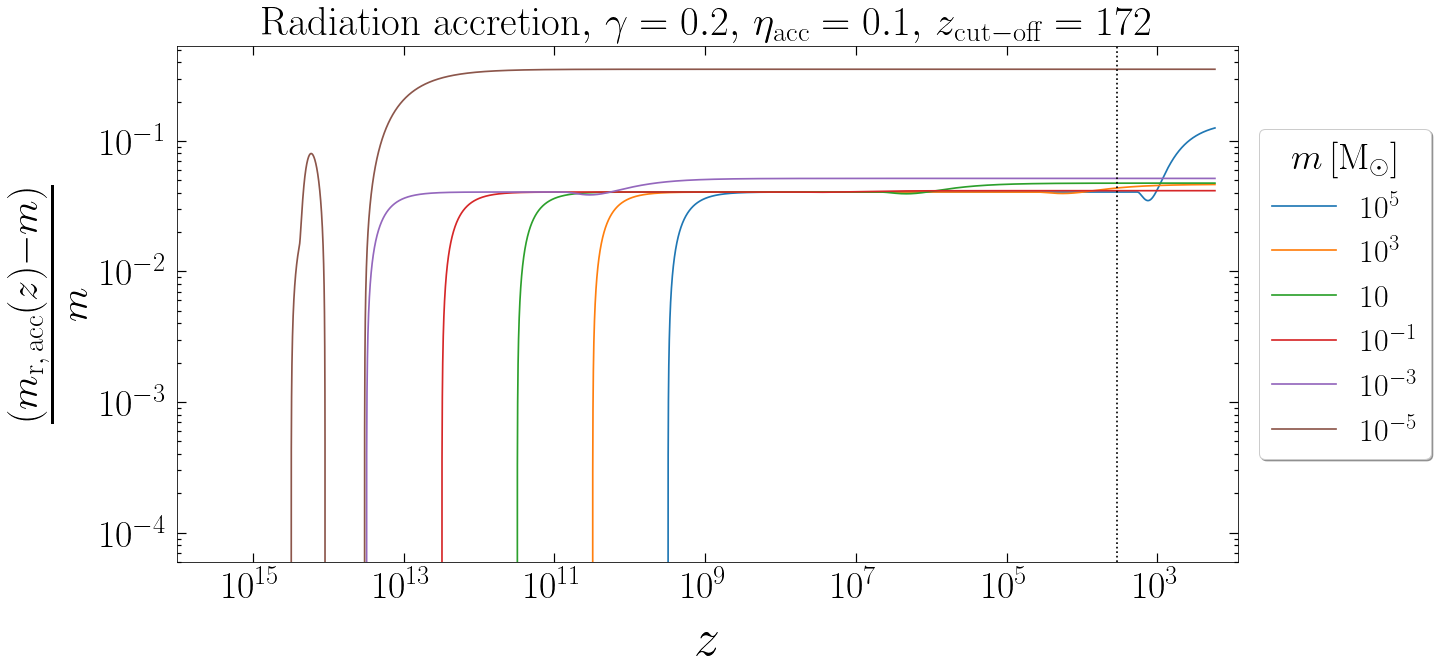

In [5]:
# Radiation accretion in radiation domination to redshift z = 172. 


colors = ['C0', 'C1','C2','C3','C4', 'C5']
fig,ax = plt.subplots(1, figsize = (19, 9.5))
plt.rc('lines', linewidth = 1.7)
plt.rcParams['font.family'] = 'serif'
plt.tick_params(axis = 'both', right=True, top=True, which = 'minor', width= 1.2, length = 4, direction = 'in')
plt.tick_params(axis = 'both', right=True, top=True, which = 'major', width= 1.2, length = 9, direction = 'in')



for i, (m1, color) in enumerate(zip(m1_arr, colors)):
    γ = 0.2
    z_i = z_pbh(m1,  γ)
    y = m1
    z_cut_off = 172
    t = np.geomspace(z_i, z_cut_off, 10000)
    sol = solve_ivp(m_racc, t_span = [t[0], t[-1]], y0 = [y],  t_eval = t)
    ax.loglog(sol.t, (sol.y[0] - y)/y)

    
    
    
    
    
plt.axvline(x = z_eq,  color = 'k',  linestyle = ':')
ax.tick_params(axis='x', pad = 8.9)
ax.tick_params(axis='y', pad = 8.9)


plt.xticks(fontsize = 38)
plt.yticks(fontsize = 38)
plt.xlabel('$z$',fontsize = 52, labelpad = 14)
plt.ylabel(r'$\frac{(m_\mathrm{r, \, acc}(z) - m)}{m} $',fontsize = 58, labelpad = 14)

plt.legend(['$10^{5}$', r'$10^{3}$', '$10$', 
            '$10^{-1}$', '$10^{-3}$', r'$10^{-5}$'], 
           prop = {'size':32}, loc = (1.02, 0.2), shadow = True, 
           title = '$m\, [\mathrm{M_{\odot}}]$' ,
           title_fontsize = 37, facecolor = 'white', fontsize = 65)
plt.xlim(1e16, 0.5*z_cut_off)
#plt.ylim(1e-5, 0.1)
plt.title(r'Radiation accretion$,\, \gamma = 0.2, \,\eta_\mathrm{acc} = 0.1, \, z_\mathrm{cut-off} = 172$', fontsize = 41, pad = 11)
#plt.savefig('racc_z_th.pdf', bbox_inches = 'tight')
plt.show()

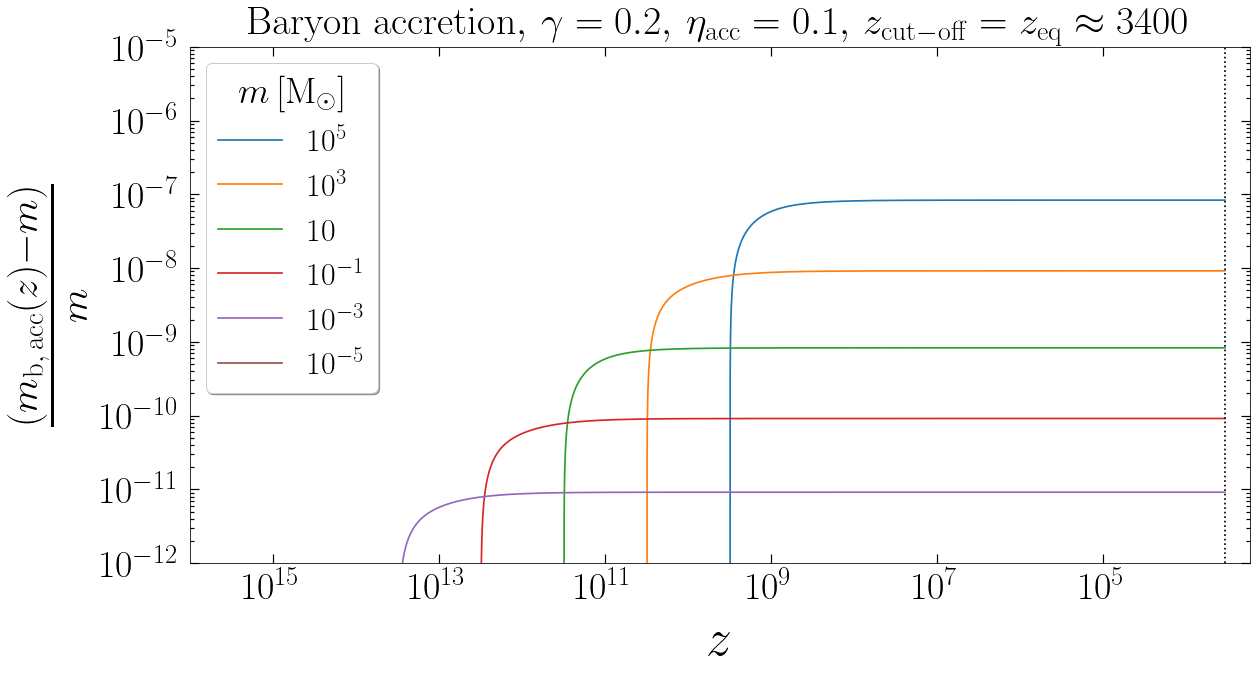

In [6]:
# Baryon accretion in radiation domination to upto z_eq.


colors = ['C0', 'C1','C2','C3','C4', 'C5']
fig,ax = plt.subplots(1, figsize = (19, 9.5))
plt.rc('lines', linewidth = 1.7)
plt.rcParams['font.family'] = 'serif'
plt.tick_params(axis = 'both', right=True, top=True, which = 'minor', width= 1.2, length = 4, direction = 'in')
plt.tick_params(axis = 'both', right=True, top=True, which = 'major', width= 1.2, length = 9, direction = 'in')



for i, (m1, color) in enumerate(zip(m1_arr, colors)):
    γ = 0.2
    z_i = z_pbh(m1,  γ)
    y = m1
    z_cut_off = z_eq
    t = np.geomspace(z_i, z_cut_off, 10000)
    sol = solve_ivp(m_bacc, t_span = [t[0], t[-1]], y0 = [y],  t_eval = t)
    ax.loglog(sol.t, (sol.y[0] - y)/y)

    
plt.axvline(x = z_eq,  color = 'k',  linestyle = ':')


ax.tick_params(axis='x', pad = 8.9)
ax.tick_params(axis='y', pad = 8.9)


plt.xticks(fontsize = 38)
plt.yticks(fontsize = 38)
plt.xlabel('$z$',fontsize = 52, labelpad = 14)
plt.ylabel(r'$\frac{(m_\mathrm{b, \, acc}(z) - m)}{m} $',fontsize = 58, labelpad = 14)
plt.legend(['$10^{5}$', r'$10^{3}$', '$10$',
            '$10^{-1}$',  '$10^{-3}$', r'$10^{-5}$'], 
           prop = {'size':32}, loc = 'upper left', shadow = True, 
           title = '$m\, [\mathrm{M_{\odot}}]$' ,
           title_fontsize = 37, facecolor = 'white', fontsize = 65)

plt.xlim(1e16, 0.5*z_cut_off)
plt.ylim(1e-12, 1e-5)
plt.title(r'Baryon accretion$,\, \gamma = 0.2, \,\eta_\mathrm{acc} = 0.1, \, z_\mathrm{cut-off} = z_\mathrm{eq} \approx 3400$', fontsize = 40, pad = 13)
plt.savefig('bacc_zeq.pdf', bbox_inches = 'tight')
plt.show()

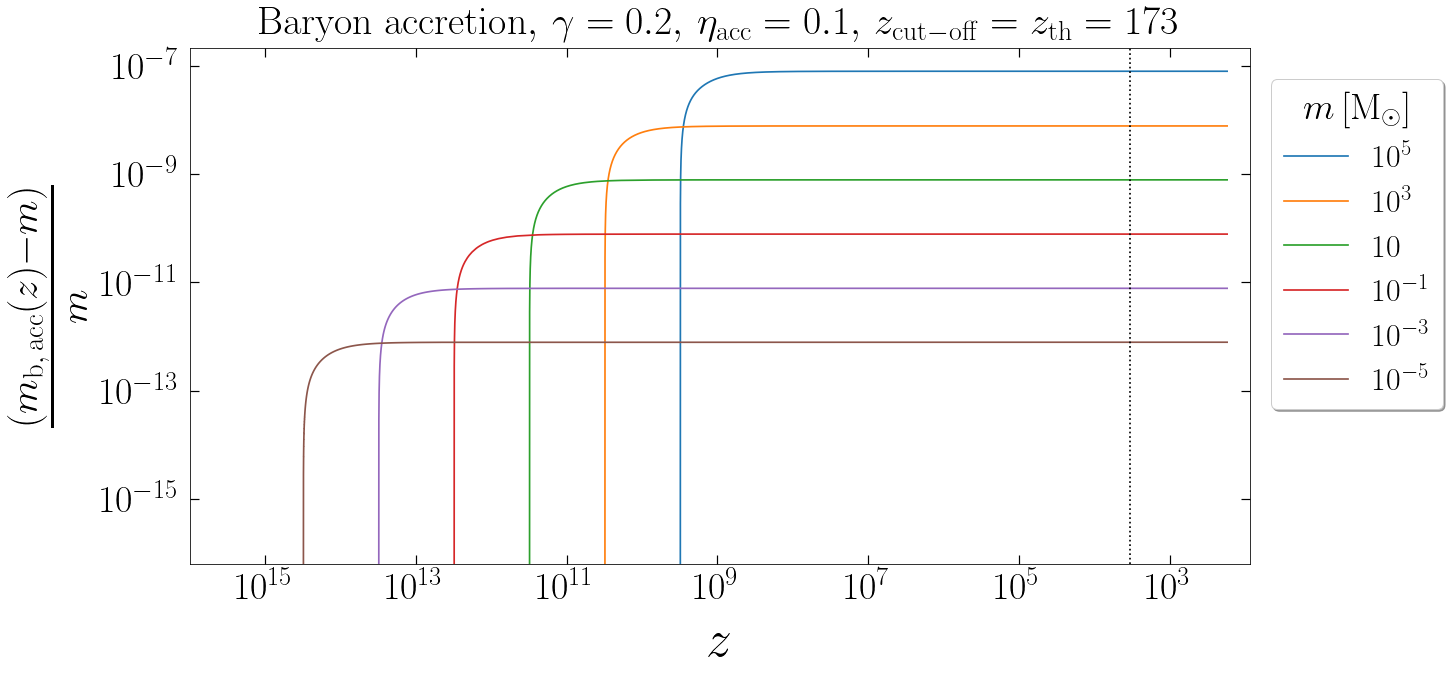

In [7]:
# Baryon accretion in radiation domination to redshift z = z_th = 173. 


colors = ['C0', 'C1','C2','C3','C4', 'C5']
fig,ax = plt.subplots(1, figsize = (19, 9.5))
plt.rc('lines', linewidth = 1.7)
plt.rcParams['font.family'] = 'serif'
plt.tick_params(axis = 'both', right=True, top=True, which = 'minor', width= 1.2, length = 4, direction = 'in')
plt.tick_params(axis = 'both', right=True, top=True, which = 'major', width= 1.2, length = 9, direction = 'in')



for i, (m1, color) in enumerate(zip(m1_arr, colors)):
    γ = 0.2
    z_i = z_pbh(m1,  γ)
    y = m1
    z_cut_off = z_th
    t = np.geomspace(z_i, z_cut_off, 1000000)
    sol = solve_ivp(m_bacc, t_span = [t[0], t[-1]], y0 = [y],  t_eval = t)
    ax.loglog(sol.t, (sol.y[0] - y)/y)

    
plt.axvline(x = z_eq,  color = 'k',  linestyle = ':')


ax.tick_params(axis='x', pad = 8.9)
ax.tick_params(axis='y', pad = 8.9)


plt.xticks(fontsize = 38)
plt.yticks(fontsize = 38)
plt.xlabel('$z$',fontsize = 52, labelpad = 14)
plt.ylabel(r'$\frac{(m_\mathrm{b,\, acc}(z) - m)}{m} $',fontsize = 58, labelpad = 14)
plt.legend(['$10^{5}$', r'$10^{3}$', '$10$',
            '$10^{-1}$', '$10^{-3}$', r'$10^{-5}$'], 
           prop = {'size':32}, loc = (1.02, 0.3), shadow = True, 
           title = '$m\, [\mathrm{M_{\odot}}]$' ,
           title_fontsize = 37, facecolor = 'white', fontsize = 65)

plt.xlim(1e16, 0.5*z_cut_off)
#plt.ylim(1e-12, 1e-5)
plt.title(r'Baryon accretion$,\, \gamma = 0.2, \,\eta_\mathrm{acc} = 0.1, \, z_\mathrm{cut-off} = z_\mathrm{th} = 173$', fontsize = 40, pad = 13)
plt.savefig('bacc_zth.pdf', bbox_inches = 'tight')
plt.show()

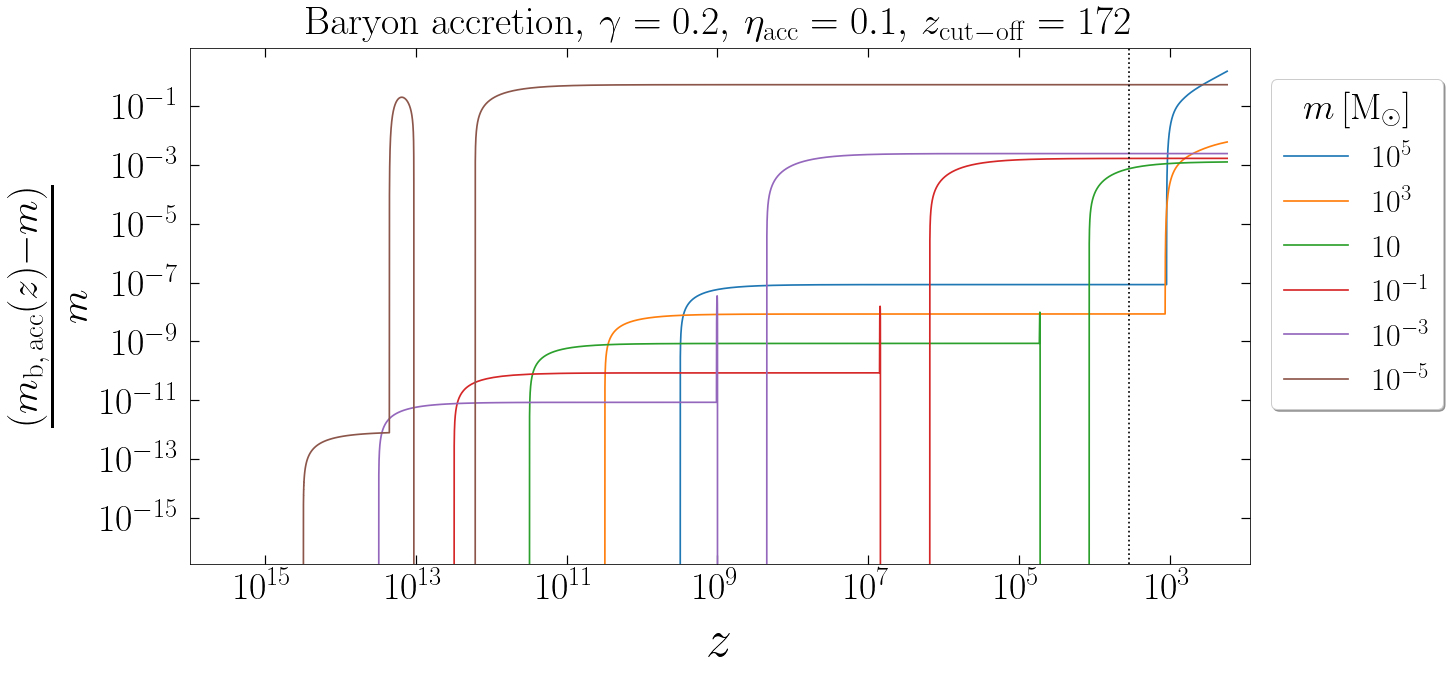

In [8]:
# Baryon accretion in radiation domination to redshift z = z_th = 172. 


colors = ['C0', 'C1','C2','C3','C4', 'C5']
fig,ax = plt.subplots(1, figsize = (19, 9.5))
plt.rc('lines', linewidth = 1.7)
plt.rcParams['font.family'] = 'serif'
plt.tick_params(axis = 'both', right=True, top=True, which = 'minor', width= 1.2, length = 4, direction = 'in')
plt.tick_params(axis = 'both', right=True, top=True, which = 'major', width= 1.2, length = 9, direction = 'in')



for i, (m1, color) in enumerate(zip(m1_arr, colors)):
    γ = 0.2
    z_i = z_pbh(m1,  γ)
    y = m1
    z_cut_off = 172
    t = np.geomspace(z_i, z_cut_off, 1000000)
    sol = solve_ivp(m_bacc, t_span = [t[0], t[-1]], y0 = [y],  t_eval = t)
    ax.loglog(sol.t, (sol.y[0] - y)/y)

    
plt.axvline(x = z_eq,  color = 'k',  linestyle = ':')


ax.tick_params(axis='x', pad = 8.9)
ax.tick_params(axis='y', pad = 8.9)


plt.xticks(fontsize = 38)
plt.yticks(fontsize = 38)
plt.xlabel('$z$',fontsize = 52, labelpad = 14)
plt.ylabel(r'$\frac{(m_\mathrm{b,\, acc}(z) - m)}{m} $',fontsize = 58, labelpad = 14)
plt.legend(['$10^{5}$', r'$10^{3}$', '$10$',
            '$10^{-1}$', '$10^{-3}$', r'$10^{-5}$'], 
           prop = {'size':32}, loc = (1.02, 0.3), shadow = True, 
           title = '$m\, [\mathrm{M_{\odot}}]$' ,
           title_fontsize = 37, facecolor = 'white', fontsize = 65)

plt.xlim(1e16, 0.5*z_cut_off)
#plt.ylim(1e-12, 1e-5)
plt.title(r'Baryon accretion$,\, \gamma = 0.2, \,\eta_\mathrm{acc} = 0.1, \, z_\mathrm{cut-off} =  172$', fontsize = 40, pad = 13)
#plt.savefig('bacc_zth.pdf', bbox_inches = 'tight')
plt.show()